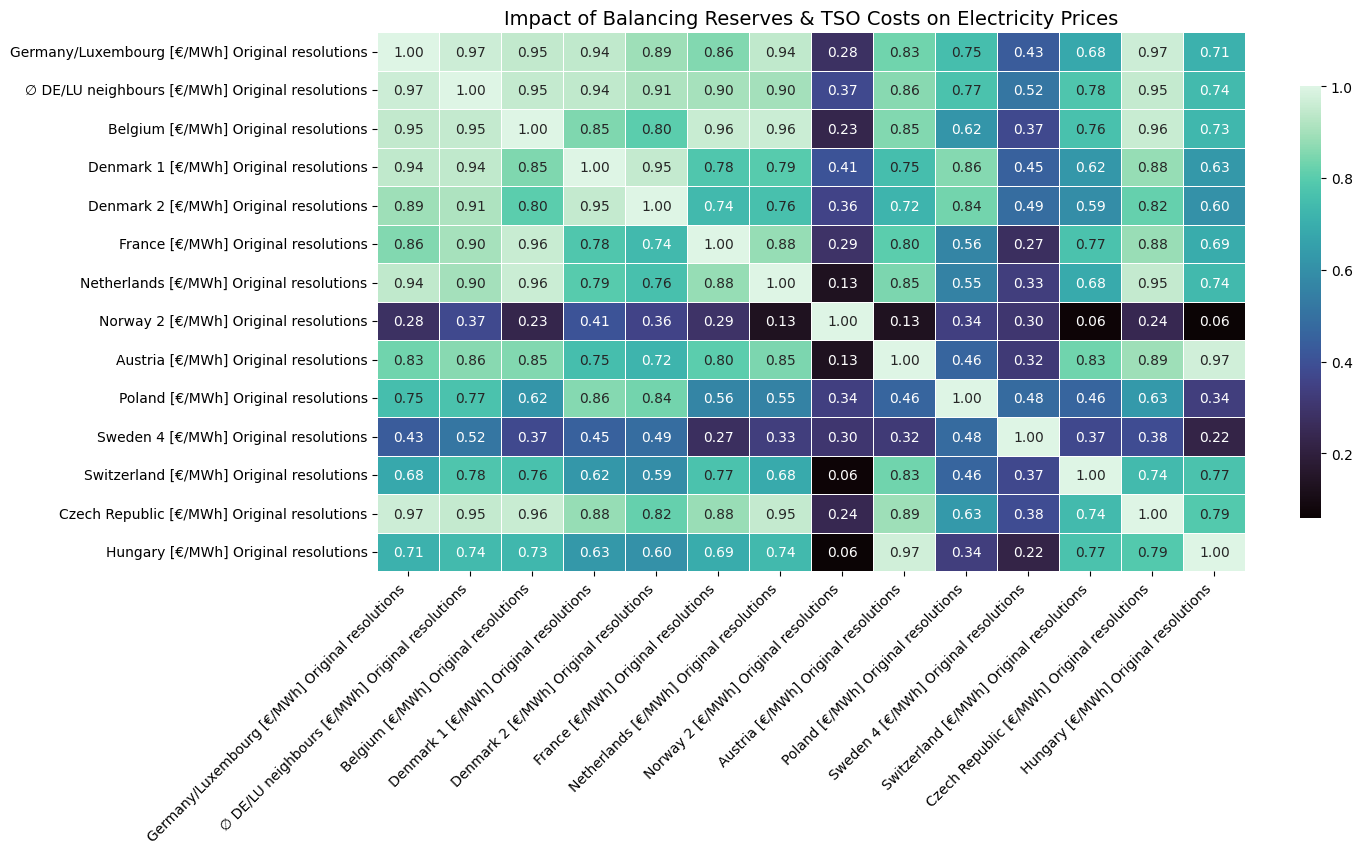

✅ Correlation heatmap saved as 'balancing_reserves_tso_correlation.png'.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# =========================
# 📌 Define Paths
# =========================
PLOTS_DIR = "../visualizations"
os.makedirs(PLOTS_DIR, exist_ok=True)  # Ensure directory exists

# =========================
# 📌 Load Datasets
# =========================
balancing_reserves_file = "../data/transformed/transformed_refined_Balancing_energy_202301010000_202503050000_Quarterhour_Month.csv"
tso_costs_file = "../data/transformed/transformed_refined_Costs_of_TSOs__without_costs_of_DSOs__202301010000_202503050000_Month.csv"
price_file = "../data/transformed/transformed_refined_Day-ahead_prices_202301010000_202503050000_Hour.csv"

df_balancing = pd.read_csv(balancing_reserves_file, delimiter=",", low_memory=False)
df_tso = pd.read_csv(tso_costs_file, delimiter=",", low_memory=False)
df_price = pd.read_csv(price_file, delimiter=",", low_memory=False)

# =========================
# 📌 Convert Time Column
# =========================
df_balancing["Start date"] = pd.to_datetime(df_balancing["Start date"], errors="coerce")
df_tso["Start date"] = pd.to_datetime(df_tso["Start date"], errors="coerce")
df_price["Start date"] = pd.to_datetime(df_price["Start date"], errors="coerce")

# =========================
# 📌 Merge Datasets
# =========================
df_merged = df_price.merge(df_balancing, on="Start date", how="inner") \
                    .merge(df_tso, on="Start date", how="inner")

# Drop non-numeric columns before correlation
df_numeric = df_merged.select_dtypes(include=["number"])

# =========================
# 📌 Compute & Plot Correlation Matrix
# =========================
corr_matrix = df_numeric.corr()

plt.figure(figsize=(14, 7))
sns.heatmap(corr_matrix, annot=True, cmap="mako", fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.8})

plt.title("Impact of Balancing Reserves & TSO Costs on Electricity Prices", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)

# =========================
# 📌 Save & Show Plot
# =========================
plot_filename = "balancing_reserves_tso_correlation.png"
plt.savefig(os.path.join(PLOTS_DIR, plot_filename), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print(f"✅ Correlation heatmap saved as '{plot_filename}'.")
